In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization  
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\inv}[1]{\left( #1\right)^{-1}}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$

$\newcommand{\mat}[1]{
\left[
\begin{matrix}
#1
\end{matrix}
\right]
}
$

$\newcommand{\arrthree}[1]{
\begin{array}{rlr}
#1
\end{array}
}
$

$
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
$

$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$



sum, product
$
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet bold,
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
\newcommand{\Ub}{\mathbf{U}}
$

math bold
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
$

Poly curve fitting
====================

$$
\arrthree{
\Xb \wb &= \bb \\
\Xt \Xb \wb &= \Xt \bb \\
\hat{\wb} &= \inv{\Xt \Xb} \Xt \bb \\
}
$$

matrix([[  9.56337440e-02,   1.21358307e+01,  -3.99699231e+01,
           5.59763678e+01,  -4.10175830e+01,   1.73167232e+01,
          -4.38292840e+00,   6.57767450e-01,  -5.39894449e-02,
           1.86719273e-03]])


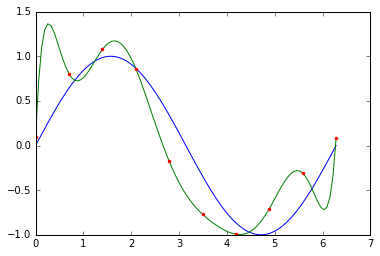

In [80]:
def plot_sin():
    x = np.linspace(0,2*math.pi, 100)
    y = [math.sin(xx) for xx in x]
    plt.plot(x,y, label='actual sin')

def gen_points_aug(x, M):
    X = np.ones_like(x).reshape(-1,1)
    for m in range(1,M+1):
        X = np.hstack([X, x**m])
    X = np.matrix(X)
    return X

def fit_poly(x, y, M):
    xp = x.reshape(-1,1)
    yp = np.matrix(y).reshape(-1,1)
    N = xp.shape[0]
    X = gen_points_aug(xp, M)
    w_hat = np.linalg.inv(X.T * X) * X.T * yp
    return w_hat

def plot_poly(w_hat):
    x = np.array(np.linspace(0,2*math.pi,100)).reshape(-1,1)
    X = gen_points_aug(x, w_hat.shape[0]-1)
    y = X * w_hat
    plt.plot(x,y,label='fit: '+str(w_hat.shape[0]))

def plot_cf(N=10, M=9, sigma_noise=0.2, plot_all=False):
    x = np.linspace(0, 2*math.pi, N)
    y = [math.sin(xx)+np.random.normal(scale=sigma_noise) for xx in x]
    
    plot_sin()
    W = np.zeros((M+1,M+1))
    if(plot_all):
        for m in range(M+1):
            w_hat = fit_poly(x, y, m)
            pprint(w_hat)
            for ix in range(m+1):
                W[m,ix] = w_hat[ix]
            plot_poly(w_hat)
    else:
        w_hat = fit_poly(x, y, M)
        pprint(w_hat.T)
        plot_poly(w_hat)
    #plt.legend()
    plt.plot(x,y,'.', label='sampled vals')
    plt.show()
    #pprint(W)
    

interact(plot_cf, N=(2,20),M=(0,11),sigma_noise=(0.1,1,0.1))

Intuitively, what is happening is that the more flexible polynomials with larger values of M are becoming increasingly tuned to the random noise on the target values.

for a given model complexity,
the over-fitting problem become less severe as the size of the data set increases

#data points = 5 or 10 times the number of adaptive parameters

 We shall see that the least squares approach
to finding the model parameters represents a specific case of maximum likelihood
(discussed in Section 1.2.5), and that the over-fitting problem can be understood as
 a general property of maximum likelihood.
 
 By adopting a Bayesian approach, the
over-fitting problem can be avoided.

We shall see that there is no difficulty from
a Bayesian perspective in employing models for which the number of parameters
greatly exceeds the number of data points.

Indeed, in a Bayesian model the effective
number of parameters adapts automatically to the size of the data set.


Regularization
================

$$
\tilde{E}(\wb)
=
\half \sumnN
\left\{
  y(x_n, \wb) - t_n
\right\}^2
+ \frac{\lambda}{2}
\Norm{\wb}^2
$$

These methods are called as shrinkage methods since they reduce the value of the coefficients.

If the regularizer is quadratic, it is called ridge regression.

In neural networks, it is called weight decay.

A suitable value for the model complexity is obtained by using a validation set or a hold-out set